# Proceso de utilizar librerias para ciencia de datos para cargar, realizar descriptivas y también realizar

### Intalar librerias

In [ ]:
# @title Instalar librerias relacionadas al toolbox
%pip install rdt
%pip install missingno
%pip install scikit-learn
%pip install flaml
%pip install rbt
%pip install h2o
%pip install numba #==0.56.4
%pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

### Cargar librerias

In [17]:
# @title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
# import autoviz
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import rdt
import missingno as msno


# Load Data

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
url = 'dataset (1).csv'

df = pd.read_csv(url)
df.head()

,NOMBRE_ENTIDAD,PRODUCTO,MOTIVO,NOMBRE_UNIDAD_CAPTURA,CODIGO_PRODUCTO,FECHA_CORTE
0,Bbva Asset Management S.A. Sociedad Fiduciaria,FIDUCIA DE ADMINISTRACIÓN,ASPECTOS CONTRACTUALES (INCUMPLIMIENTO Y/O MOD...,ENTIDAD VIGILADA,16,2014-03-31
1,Coomeva Corredores De Seguros S.A.,SEGURO DE HOGAR,ASPECTOS CONTRACTUALES (INCUMPLIMIENTO Y/O MOD...,DEFENSORES DEL CONSUMIDOR FINANCIERO,54,2017-03-31
2,Av Villas,CRÉDITO DE VIVIENDA,INADECUADO SUMINISTRO DE INFORMACIÓN EN LA VIN...,DEFENSORES DEL CONSUMIDOR FINANCIERO,2,2015-09-30
3,Banco De Bogota,CRÉDITO DE VIVIENDA,REVISIÓN Y/O LIQUIDACIÓN,DEFENSORES DEL CONSUMIDOR FINANCIERO,2,2015-12-31
4,Coltefinanciera,CUENTA DE AHORROS,FALLAS EN INTERNET,ENTIDAD VIGILADA,8,2016-03-31


# RDT (Reusable Data Transformers) para Preprocesar Datos

## completitud de la base de datos y selección de registros

<Axes: >

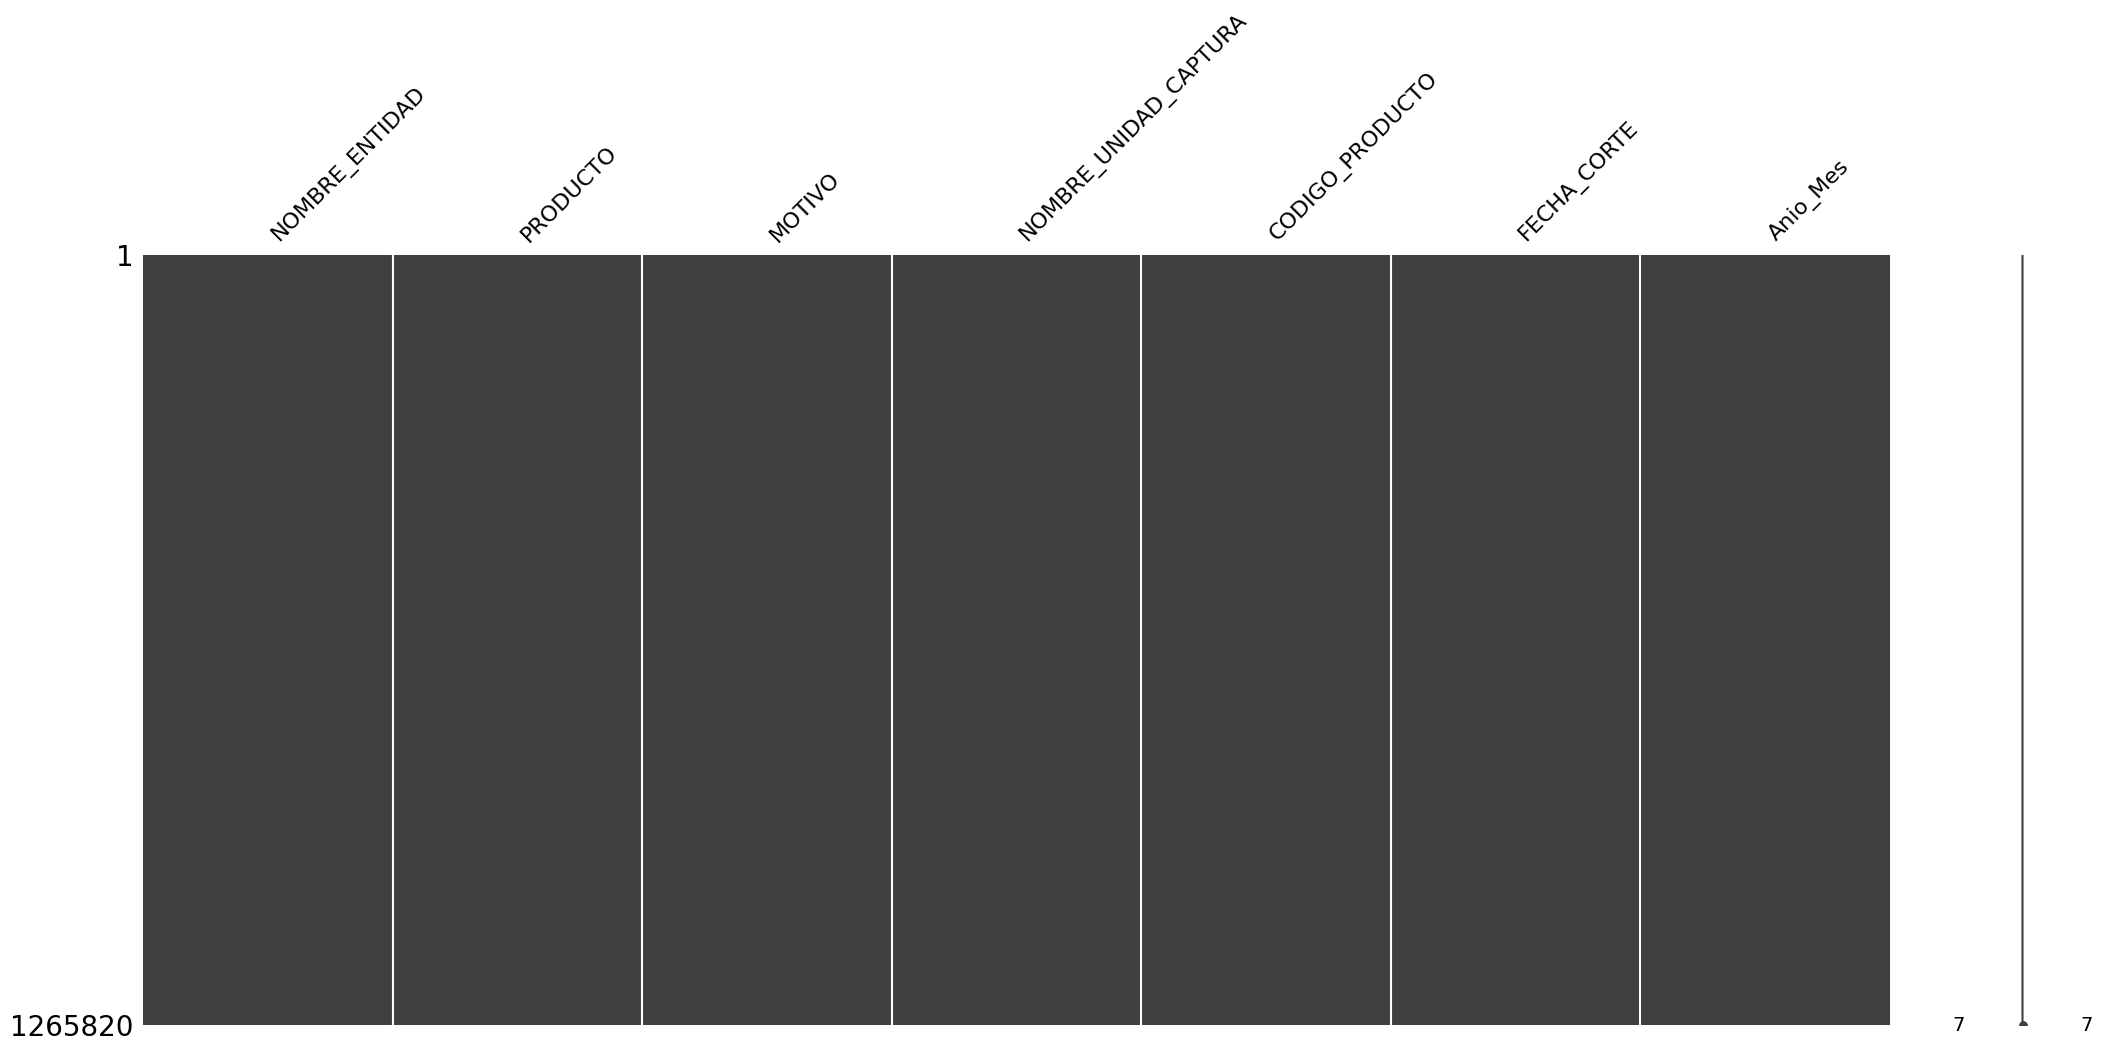

In [24]:
msno.matrix(df)


In [25]:
df.NOMBRE_UNIDAD_CAPTURA.value_counts()


NOMBRE_UNIDAD_CAPTURA
ENTIDAD VIGILADA                        676294
DEFENSORES DEL CONSUMIDOR FINANCIERO    589526
Name: count, dtype: int64

In [26]:
df.shape


(1265820, 7)

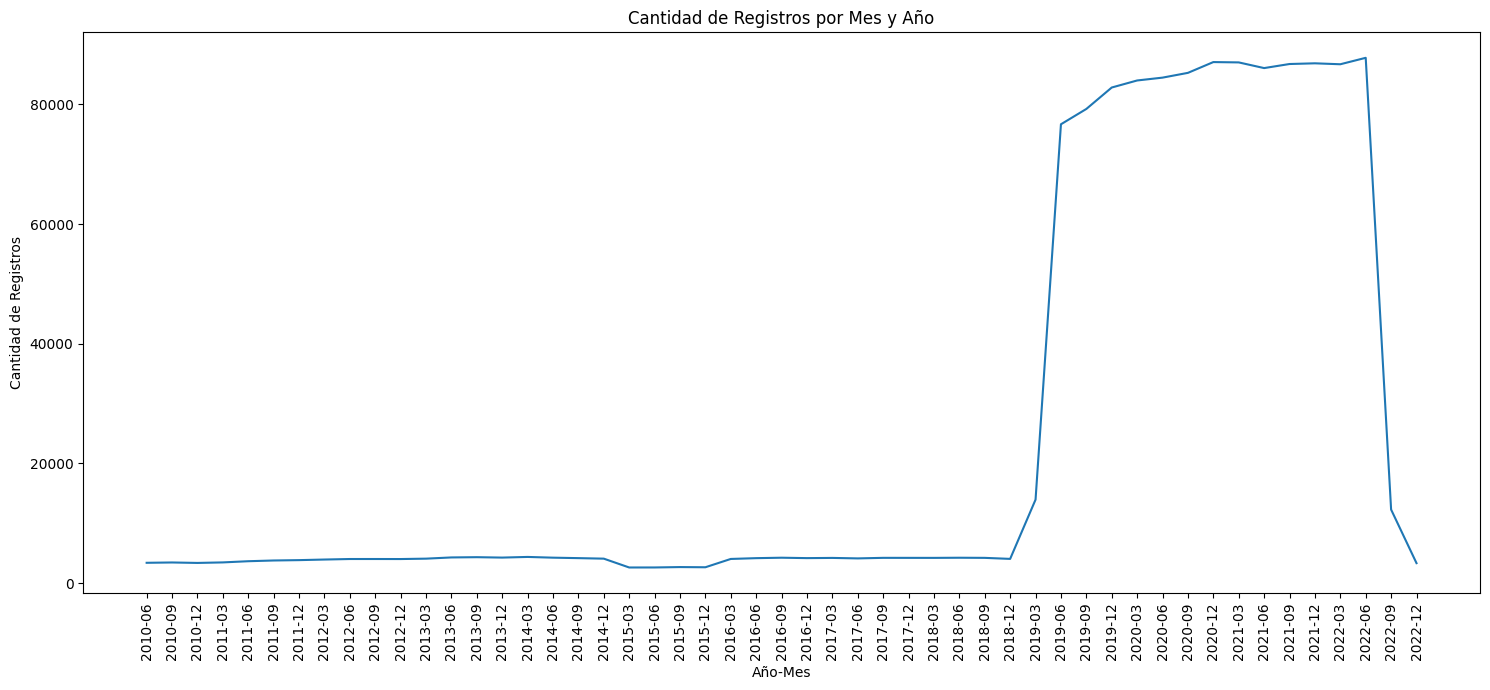

In [27]:
# prompt: necesito la grafica que me diga la cantidad de registros por mes de cadaa año

df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])
df['Anio_Mes'] = df['FECHA_CORTE'].dt.to_period('M')

registros_por_mes_anio = df.groupby('Anio_Mes').size().reset_index(name='cantidad_registros')

registros_por_mes_anio['Anio_Mes'] = registros_por_mes_anio['Anio_Mes'].astype(str)

plt.figure(figsize=(15, 7))
sns.lineplot(data=registros_por_mes_anio, x='Anio_Mes', y='cantidad_registros')
plt.title('Cantidad de Registros por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
# prompt: necesito seleccionar los registros que esten mayores al año 2021

df_after_2021 = df[df['FECHA_CORTE'].dt.year > 2021].copy()

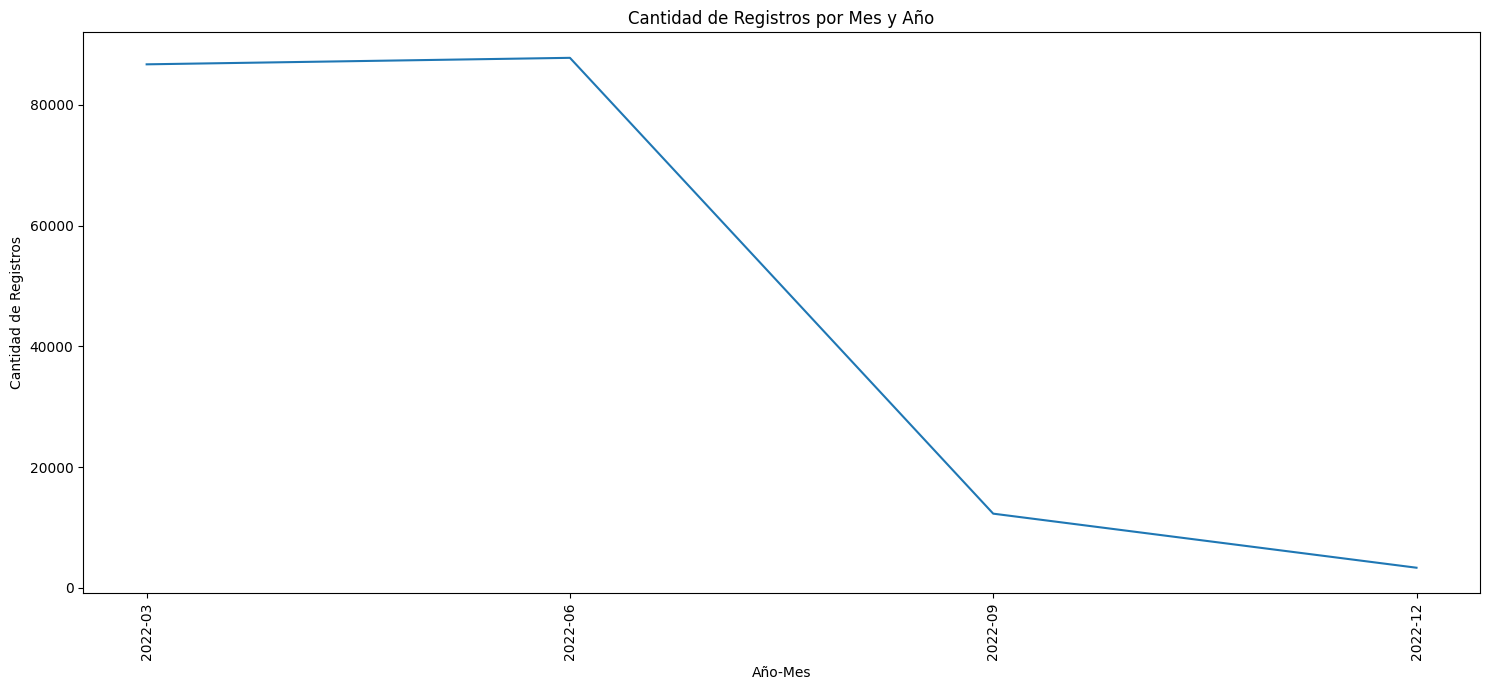

In [29]:
# prompt: necesito la grafica que me diga la cantidad de registros por mes de cadaa año

df_after_2021['FECHA_CORTE'] = pd.to_datetime(df_after_2021['FECHA_CORTE'])
df_after_2021['Anio_Mes'] = df_after_2021['FECHA_CORTE'].dt.to_period('M')

registros_por_mes_anio = df_after_2021.groupby('Anio_Mes').size().reset_index(name='cantidad_registros')

registros_por_mes_anio['Anio_Mes'] = registros_por_mes_anio['Anio_Mes'].astype(str)

plt.figure(figsize=(15, 7))
sns.lineplot(data=registros_por_mes_anio, x='Anio_Mes', y='cantidad_registros')
plt.title('Cantidad de Registros por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# prompt: necesito sacar el 50% de las muestras de la base de datos en la variable df

# df_sample = df.sample(frac=0.1, random_state=42)
df_sample = df_after_2021.copy()
df_sample = df_sample[['PRODUCTO', 'MOTIVO', 'NOMBRE_UNIDAD_CAPTURA', 'CODIGO_PRODUCTO']]

In [31]:
df_sample['NOMBRE_UNIDAD_CAPTURA'].value_counts()

NOMBRE_UNIDAD_CAPTURA
ENTIDAD VIGILADA                        99710
DEFENSORES DEL CONSUMIDOR FINANCIERO    90430
Name: count, dtype: int64

In [32]:
df_sample['NOMBRE_UNIDAD_CAPTURA'].unique()

array(['ENTIDAD VIGILADA', 'DEFENSORES DEL CONSUMIDOR FINANCIERO'],
      dtype=object)

In [33]:
df_sample['CODIGO_PRODUCTO'].value_counts()

CODIGO_PRODUCTO
1      14055
32     10580
998    10120
24      8187
3       7871
       ...  
59       330
34       300
41       224
20       187
42       120
Name: count, Length: 63, dtype: int64

## clasificación

### Transformar los datos

In [34]:
import pandas as pd
from rdt import HyperTransformer
from sklearn.model_selection import train_test_split


# 3️⃣ Eliminar filas con valores nulos
# df_ = df_sample[df_sample['CODIGO_PRODUCTO']==1].dropna()
# df_.drop(columns=['CODIGO_PRODUCTO'], inplace=True)
df_ = df_sample.dropna()
# 4️⃣ Separar variable objetivo
target_column = "NOMBRE_UNIDAD_CAPTURA"
X = df_.drop(columns=[target_column])
y = df_[target_column]
# y[y == 'DEFENSORES DEL CONSUMIDOR FINANCIERO'] = 1
# y[y == 'ENTIDAD VIGILADA'] = 0

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())
print(X_transformed.shape)



🔹 Datos originales:
                    PRODUCTO  \
16810        SEGURO DE HOGAR   
56204       PENSIÓN DE VEJEZ   
56276     SEGURO DE EXEQUIAS   
56283  SEGURO COLECTIVO VIDA   
56299       CUENTA CORRIENTE   

                                                  MOTIVO  CODIGO_PRODUCTO  
16810                                      OTROS MOTIVOS               22  
56204              VINCULACIÓN PRESUNTAMENTE FRAUDULENTA               39  
56276  ASESORÍA INCORRECTA O IMPRECISA EN LA ATENCIÓN...               23  
56283      OBJECIÓN O NEGATIVA PARA ATENDER EL SINIESTRO               47  
56299           CHEQUES (DEVOLUCIÓN, NEGOCIACIÓN, OTROS)                7  

🔹 Datos transformados:
       PRODUCTO    MOTIVO  CODIGO_PRODUCTO
16810  0.008124  0.003997             22.0
56204  0.031481  0.023693             39.0
56276  0.039957  0.039822             23.0
56283  0.063139  0.044452             47.0
56299  0.065196  0.046379              7.0
(190140, 3)


### Partición de los datos para entrenamiento y validación

In [35]:
# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

### aplicación de modelos 1

In [38]:
from flaml import AutoML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separating the target variable and rest of the data.
# y = data['Species']
# data.drop('Species',inplace=True,axis=1)
# X = data

#Using Label Encoder to convert categorical variables to numerical variables
label_endcoder = LabelEncoder()
y = label_endcoder.fit_transform(y)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size=.3,random_state =1)

automl = AutoML()

#Training the models
automl.fit(X_train, y_train, task="classification")

[flaml.automl.logger: 05-24 16:08:52] {1728} INFO - task = classification
[flaml.automl.logger: 05-24 16:08:52] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 05-24 16:08:52] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-24 16:08:53] {1861} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.logger: 05-24 16:08:54] {1955} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 05-24 16:08:54] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 05-24 16:30:23] {2393} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.logger: 05-24 16:30:23] {2442} INFO -  at 1291.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = automl.predict(X_test)
metrics = {
    "Modelo": automl.best_estimator,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
}
print("\n📊 Métricas del mejor modelo encontrado por AutoML:")
for k, v in metrics.items():
    print(f"  ▪ {k}: {v:.4f}" if isinstance(v, float) else f"  ▪ {k}: {v}")



📊 Métricas del mejor modelo encontrado por AutoML:
  ▪ Modelo: lgbm
  ▪ Accuracy: 0.5975
  ▪ Precision: 0.5965
  ▪ Recall: 0.5975
  ▪ F1 Score: 0.5960


### aplicación de modelo 2

In [76]:
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC  # SVC removido para evitar tiempo de cómputo alto
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.neural_network import MLPClassifier  # opcional

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 🎯 Diccionario de modelos personalizados
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=500),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Perceptrón": Perceptron(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "Naive Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Linear SVC": LinearSVC(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    # "MLP (Red Neuronal)": MLPClassifier(max_iter=300)
}

# 🧠 Entrenamiento y evaluación
resultados = []
confusion_matrices = {}
reporte_ = {}

for nombre, modelo in modelos.items():
    print(f"🔄 Entrenando {nombre}...")
    try:
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)

        resultados.append({
            "Modelo": nombre,
            "Accuracy": accuracy_score(y_test, pred),
            "Precision": precision_score(y_test, pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, pred, average='weighted', zero_division=0),
            "F1 Score": f1_score(y_test, pred, average='weighted', zero_division=0)
        })

        # Calcular matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        reporte_[nombre] = classification_report(y_test, y_pred, zero_division=0)
        # Guardar matriz para graficar luego
        confusion_matrices[nombre] = cm

    except Exception as e:
        print(f"⚠️ Error entrenando {nombre}: {e}")

# 📊 Mostrar resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n✅ Resultados comparativos de modelos:")
print(df_resultados)


🔄 Entrenando Regresión Logística...
🔄 Entrenando Ridge Classifier...
🔄 Entrenando SGD Classifier...
🔄 Entrenando Perceptrón...
🔄 Entrenando Passive Aggressive...
🔄 Entrenando Naive Bayes...
🔄 Entrenando Árbol de Decisión...
🔄 Entrenando Extra Tree...
🔄 Entrenando Random Forest...
🔄 Entrenando Extra Trees...
🔄 Entrenando Gradient Boosting...
🔄 Entrenando AdaBoost...


d:\Programs\Anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🔄 Entrenando Bagging...
🔄 Entrenando KNN...
🔄 Entrenando Linear SVC...


d:\Programs\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


🔄 Entrenando LDA...
🔄 Entrenando QDA...

✅ Resultados comparativos de modelos:
                 Modelo  Accuracy  Precision    Recall  F1 Score
0     Gradient Boosting  0.594334   0.593170  0.594334  0.592306
1              AdaBoost  0.581431   0.580212  0.581431  0.575480
2                   KNN  0.570019   0.569657  0.570019  0.569796
3         Random Forest  0.568651   0.568501  0.568651  0.568569
4           Extra Trees  0.565233   0.564902  0.565233  0.565034
5               Bagging  0.562901   0.566026  0.562901  0.562855
6            Extra Tree  0.550752   0.550864  0.550752  0.550805
7     Árbol de Decisión  0.548789   0.548929  0.548789  0.548854
8                   QDA  0.546019   0.543226  0.546019  0.524518
9           Naive Bayes  0.545878   0.543042  0.545878  0.524545
10                  LDA  0.541987   0.540239  0.541987  0.503496
11  Regresión Logística  0.541829   0.540028  0.541829  0.503255
12     Ridge Classifier  0.541689   0.539840  0.541689  0.503050
13       SG

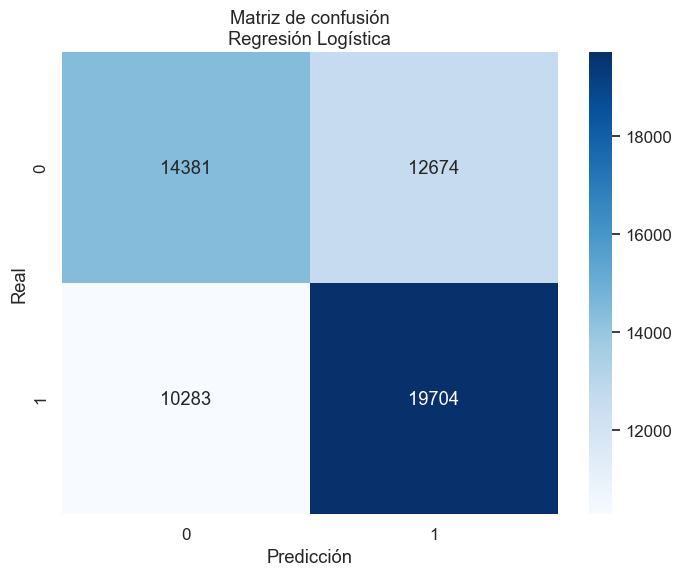


Reporte de clasificación para Regresión Logística:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



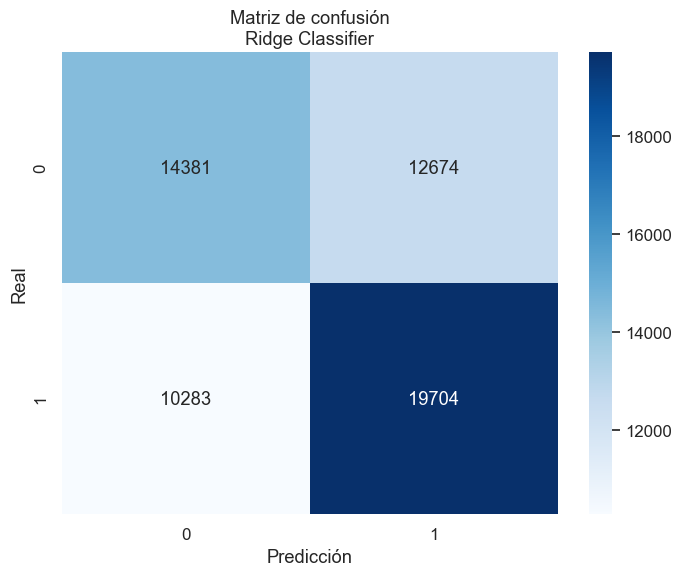


Reporte de clasificación para Ridge Classifier:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



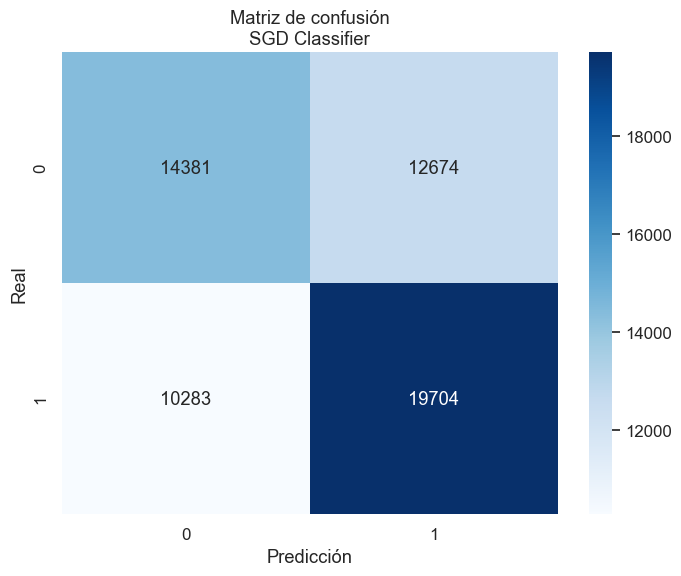


Reporte de clasificación para SGD Classifier:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



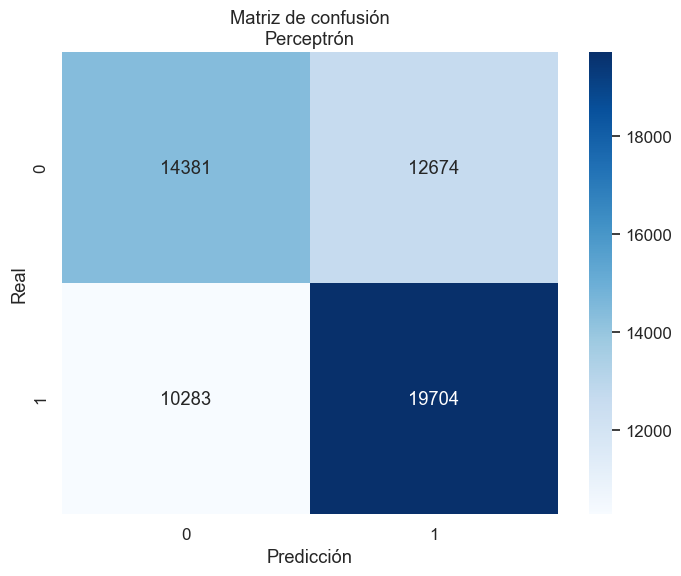


Reporte de clasificación para Perceptrón:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



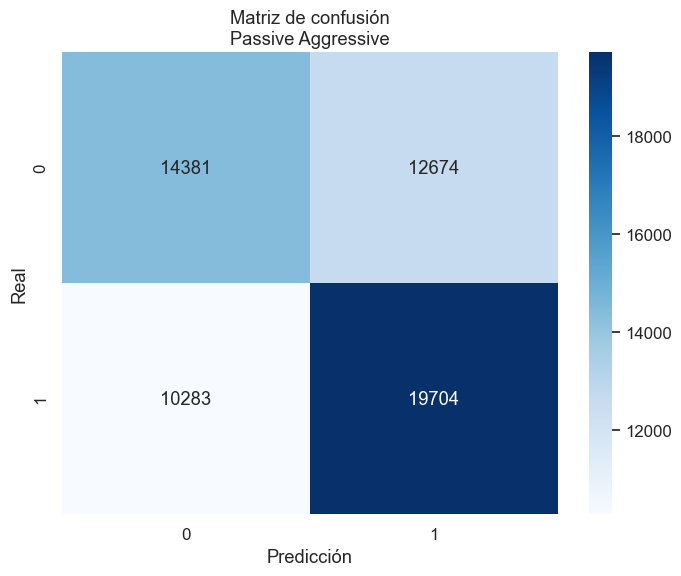


Reporte de clasificación para Passive Aggressive:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



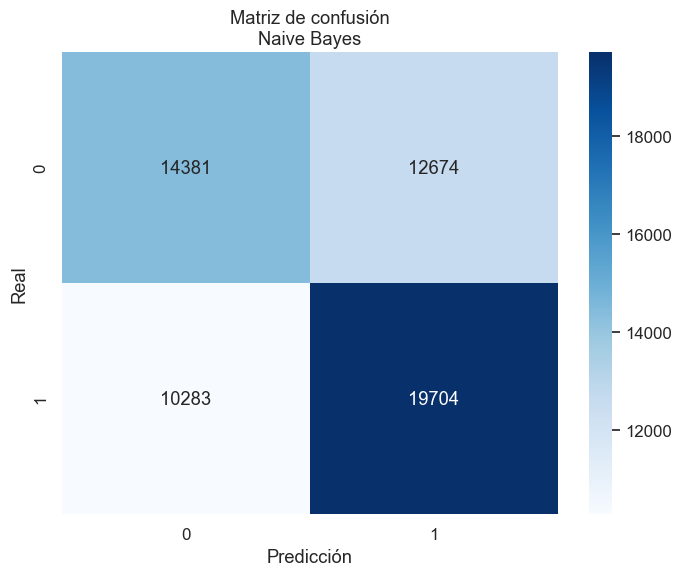


Reporte de clasificación para Naive Bayes:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



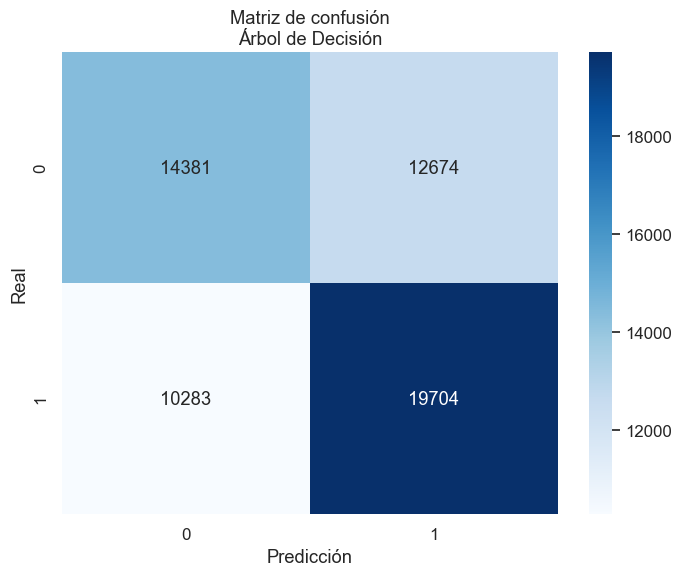


Reporte de clasificación para Árbol de Decisión:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



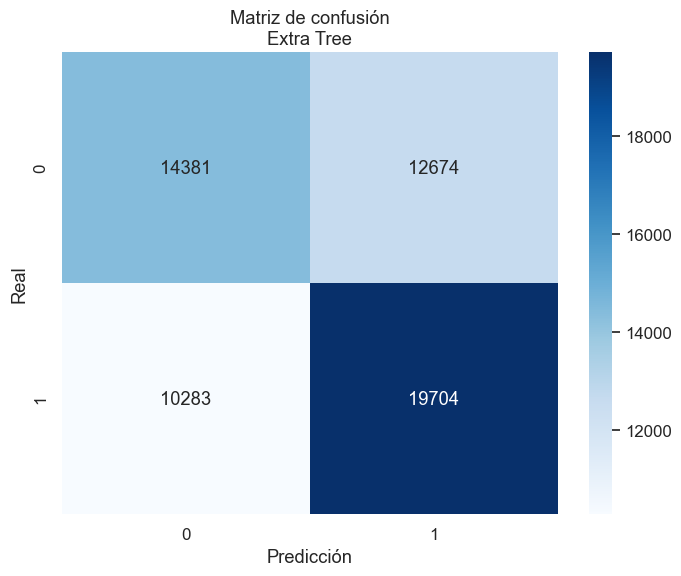


Reporte de clasificación para Extra Tree:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



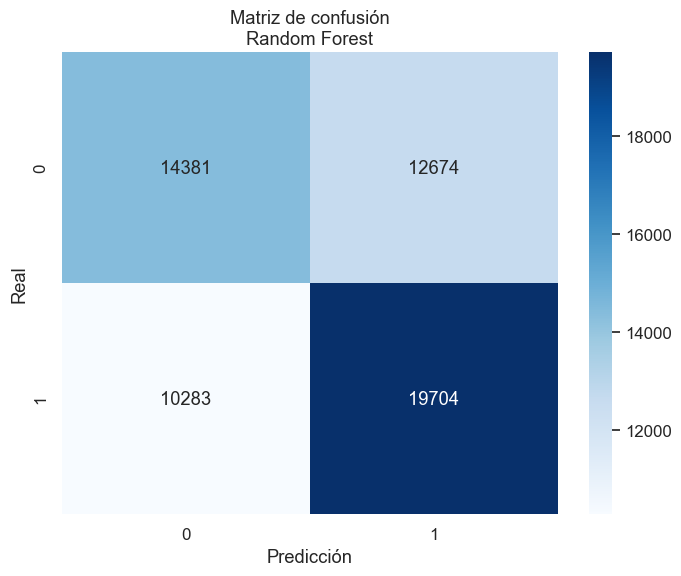


Reporte de clasificación para Random Forest:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



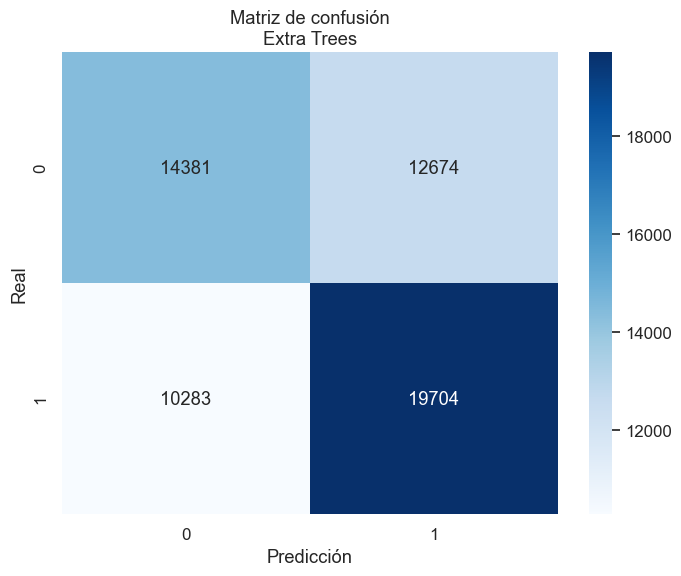


Reporte de clasificación para Extra Trees:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



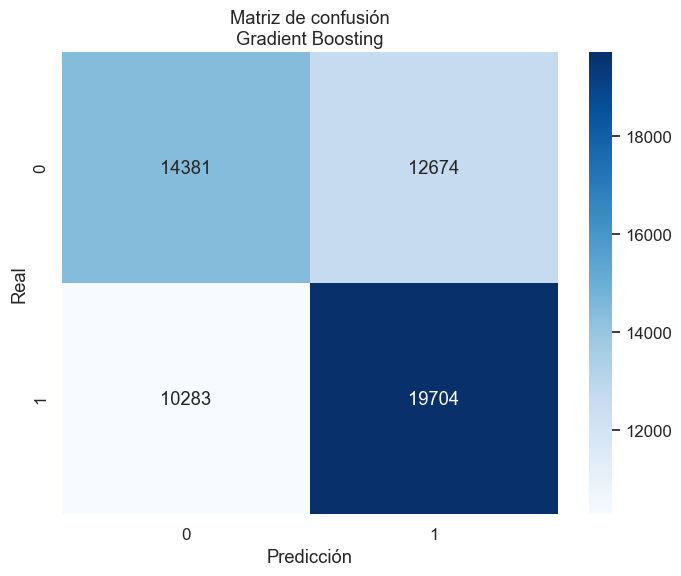


Reporte de clasificación para Gradient Boosting:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



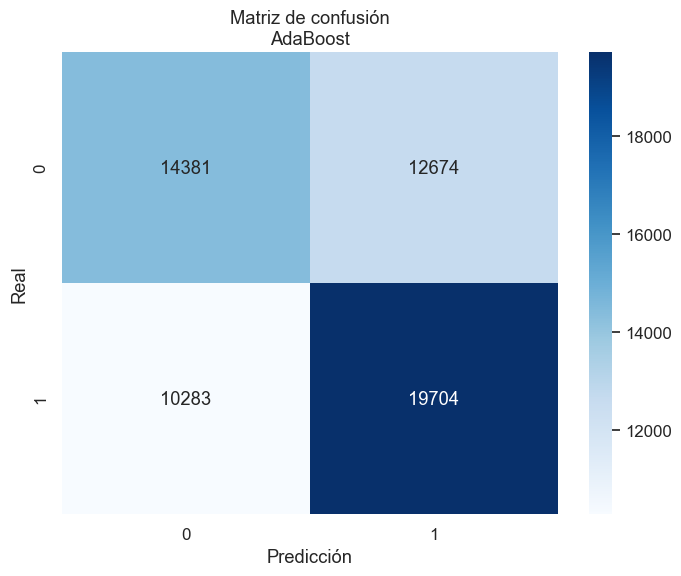


Reporte de clasificación para AdaBoost:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



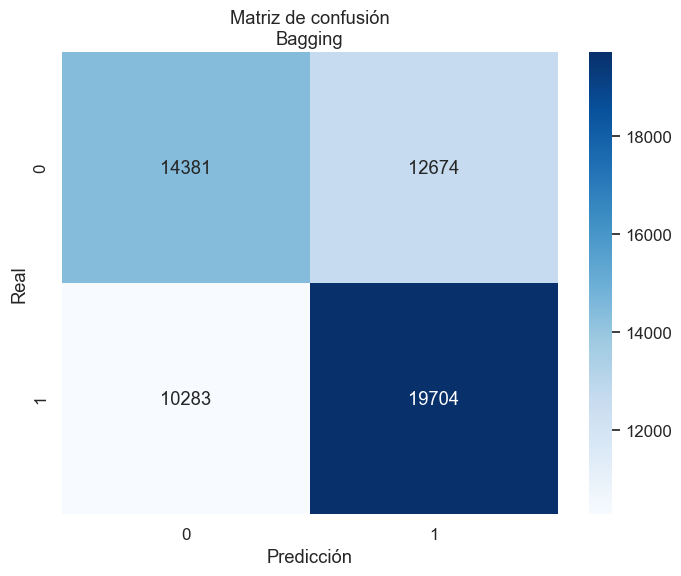


Reporte de clasificación para Bagging:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



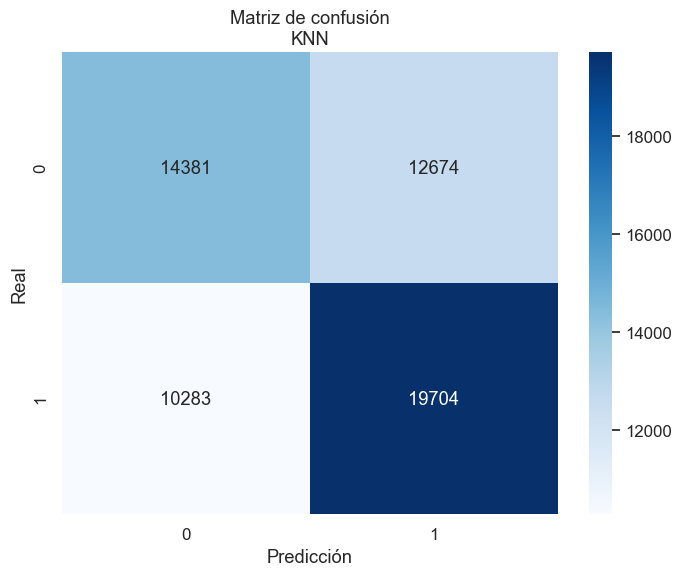


Reporte de clasificación para KNN:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



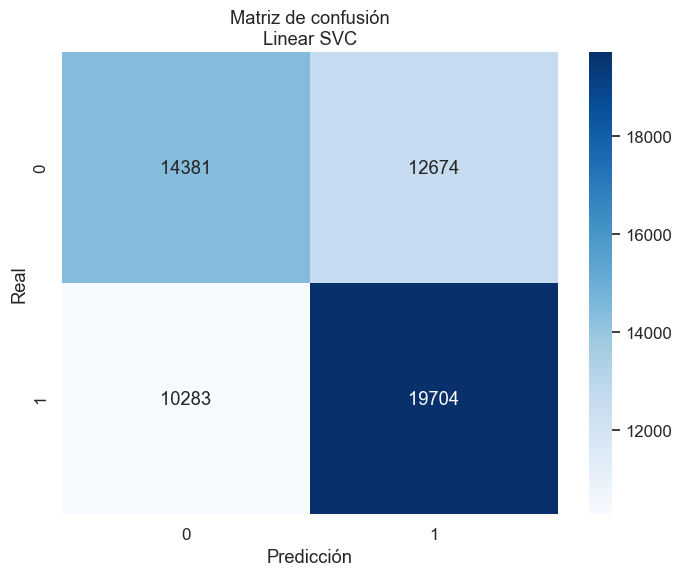


Reporte de clasificación para Linear SVC:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



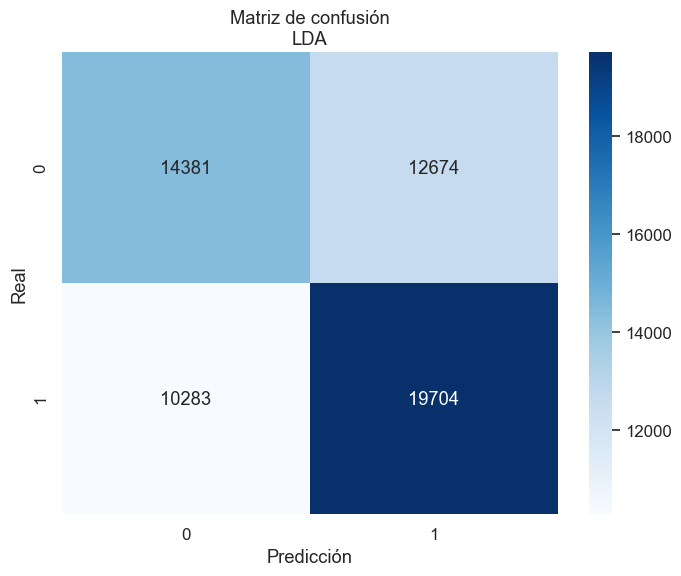


Reporte de clasificación para LDA:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



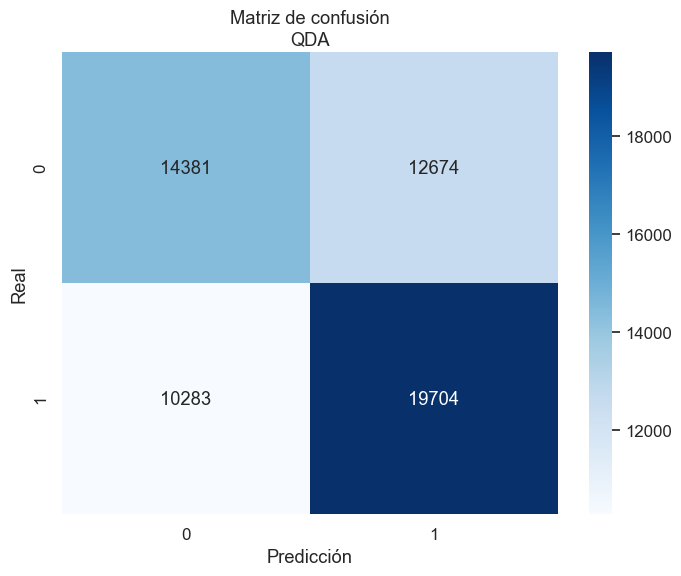


Reporte de clasificación para QDA:

              precision    recall  f1-score   support

           0       0.58      0.53      0.56     27055
           1       0.61      0.66      0.63     29987

    accuracy                           0.60     57042
   macro avg       0.60      0.59      0.59     57042
weighted avg       0.60      0.60      0.60     57042



In [78]:
from sklearn.metrics import classification_report

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión\n{model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Generar reporte de clasificación para este modelo
    # model = modelos_entrenados[model_name]
    # y_pred = model.predict(X_test)
    print(f"\nReporte de clasificación para {model_name}:\n")
    print(reporte_[model_name])


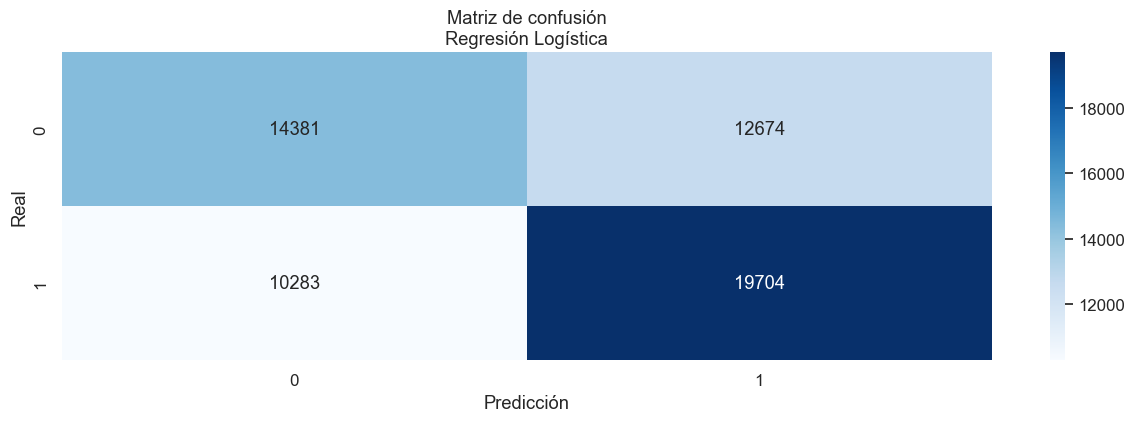

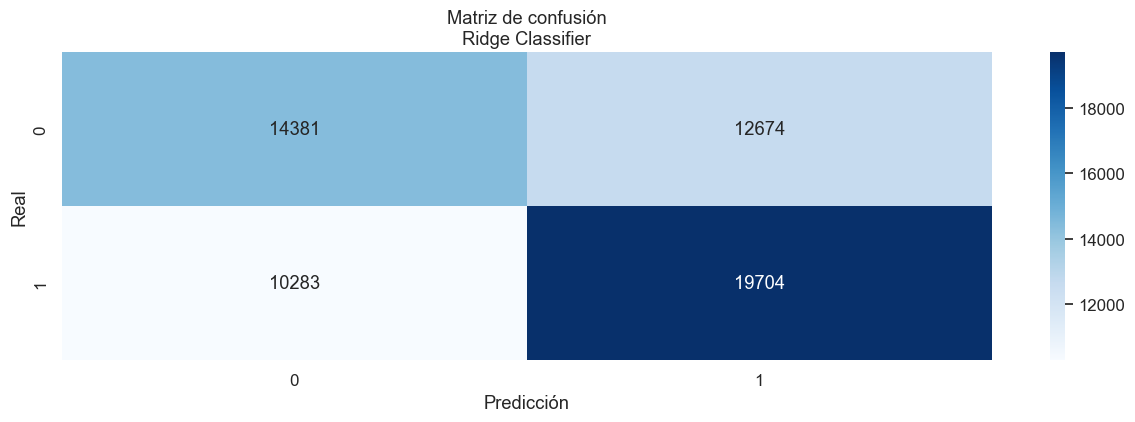

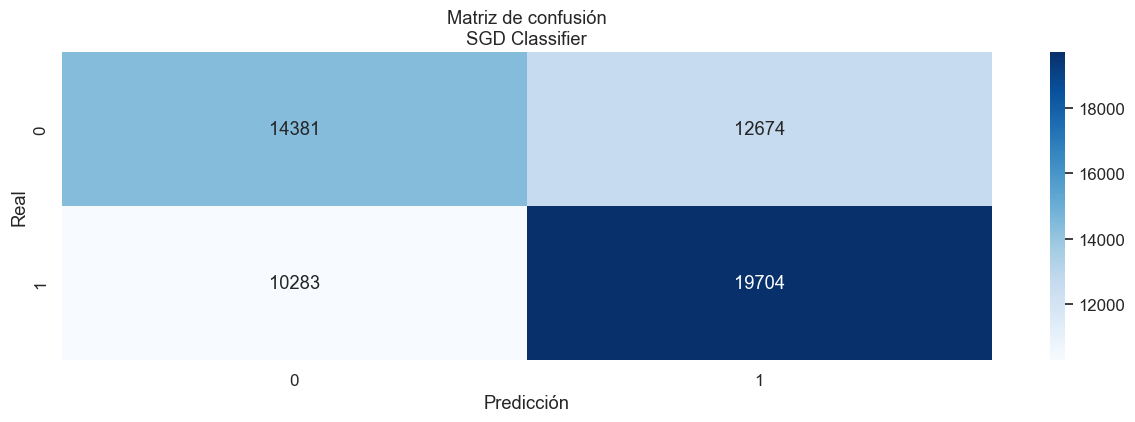

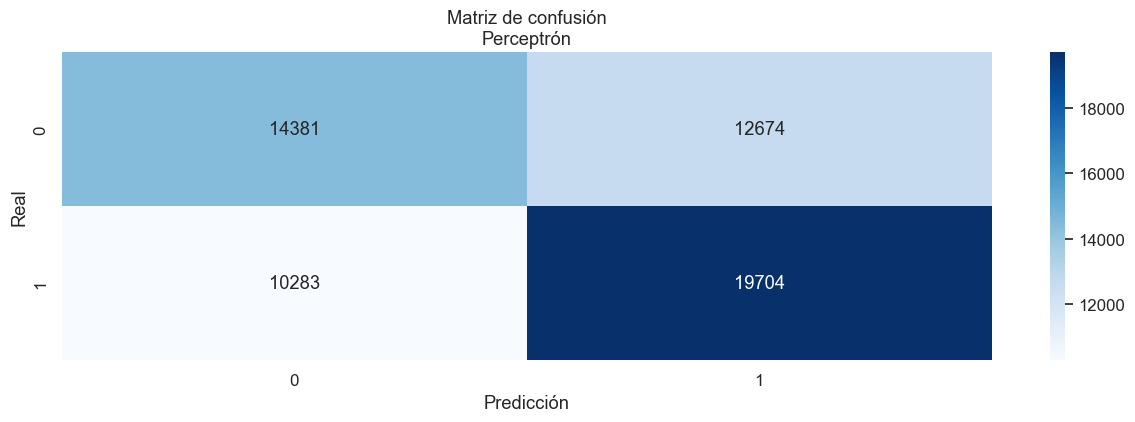

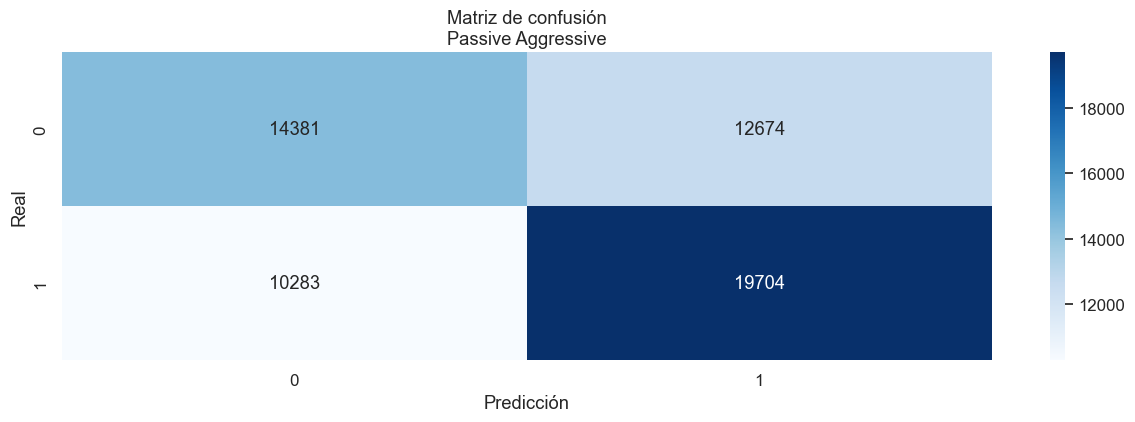

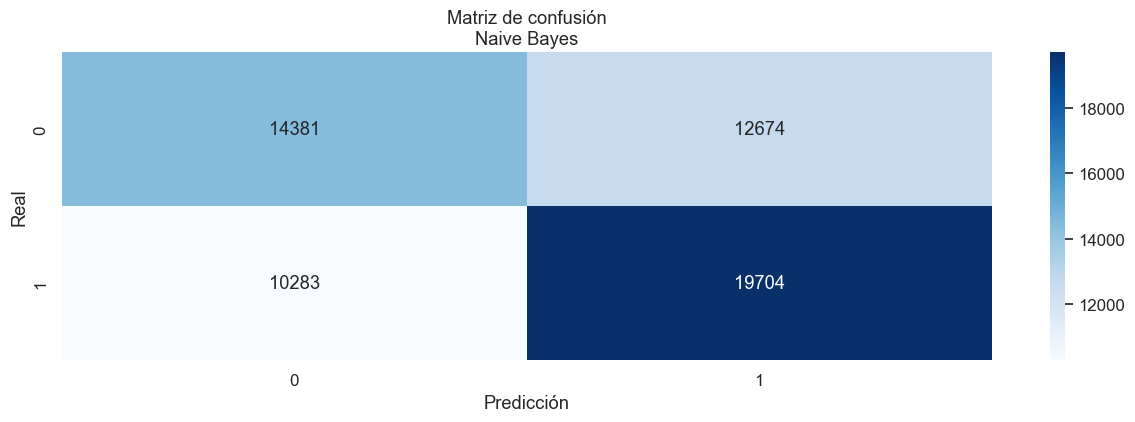

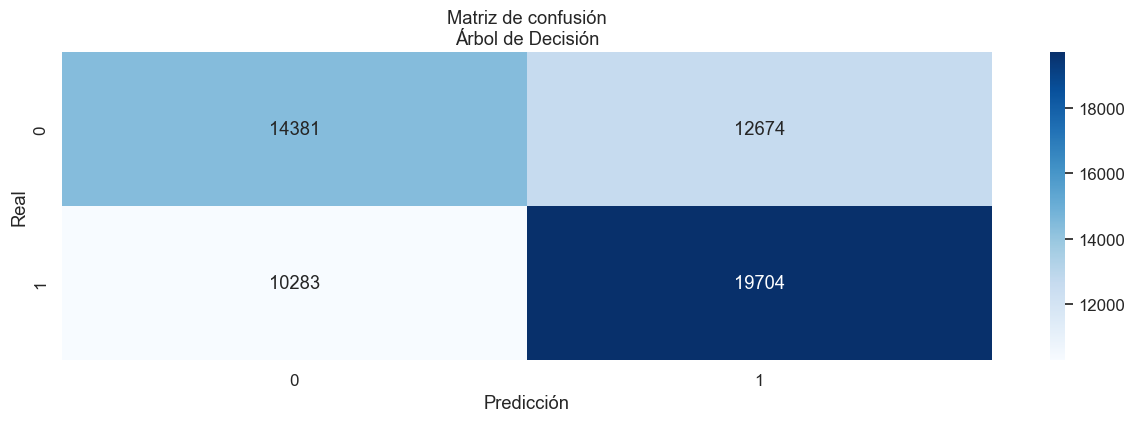

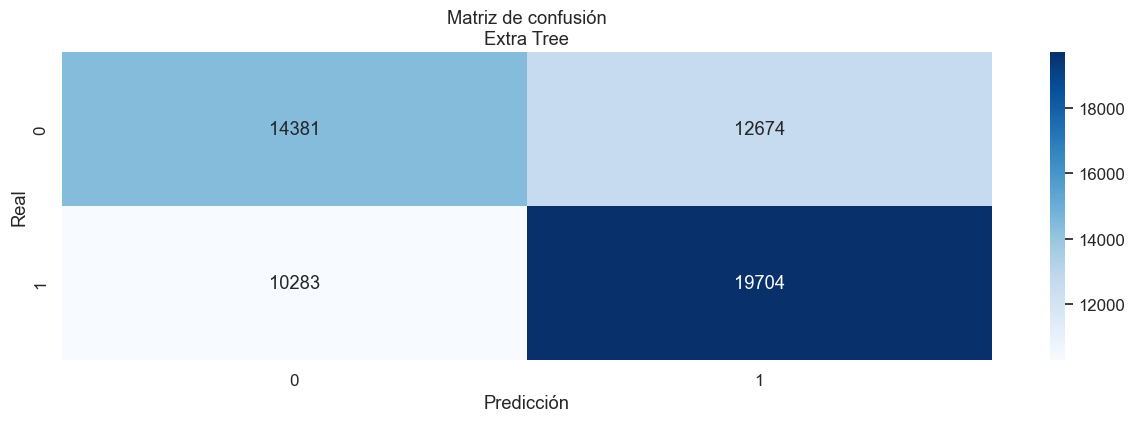

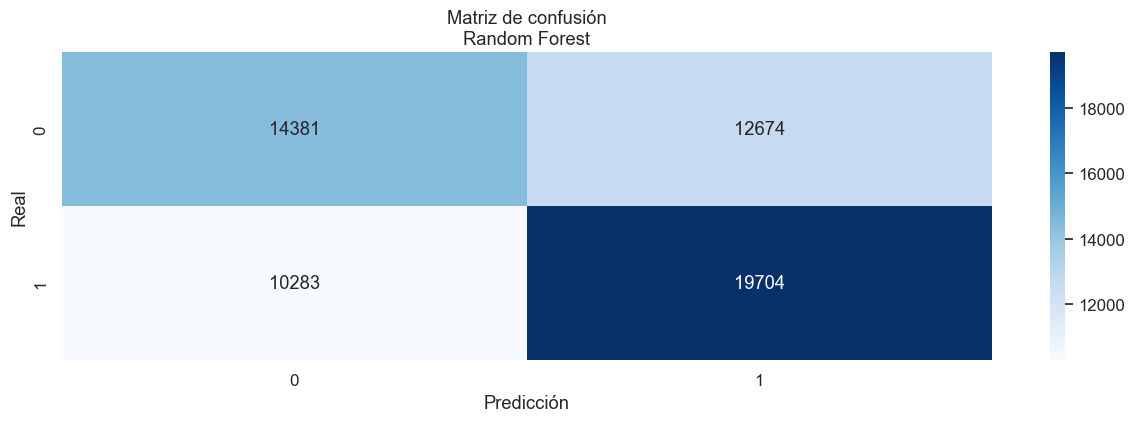

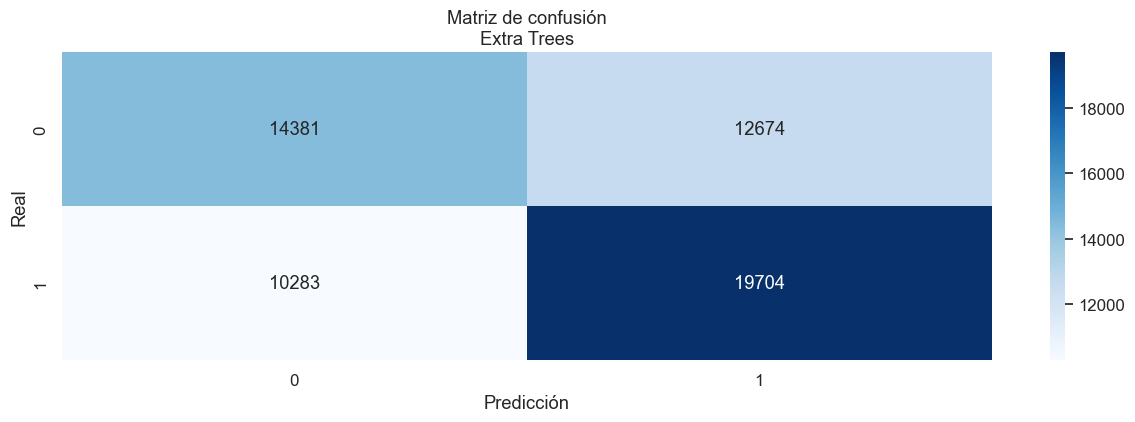

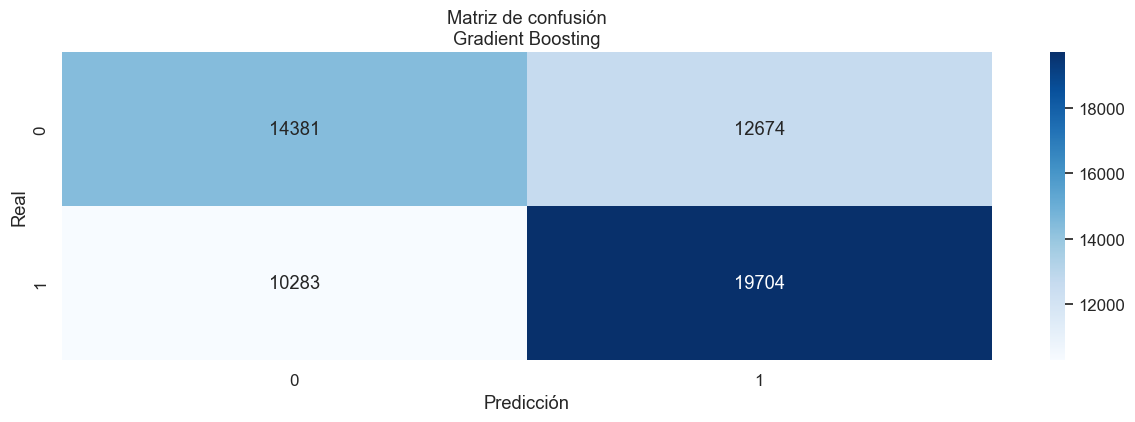

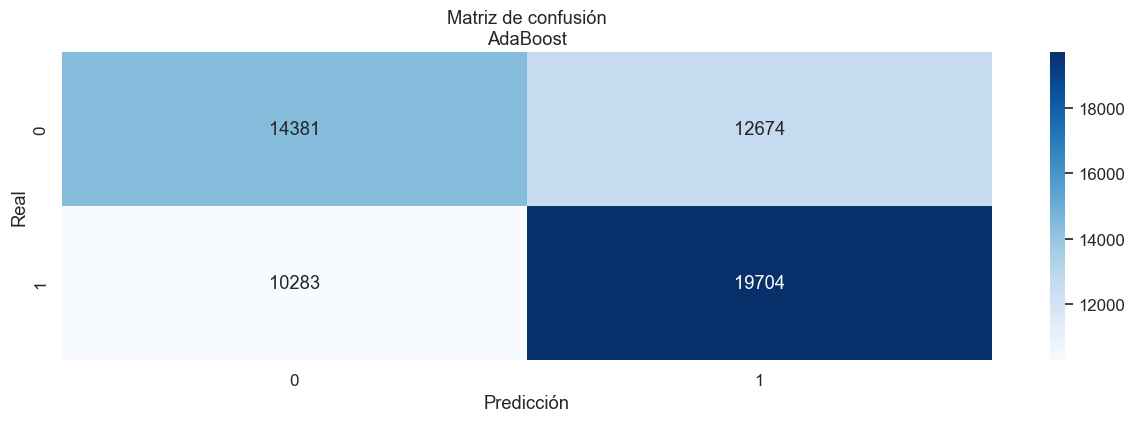

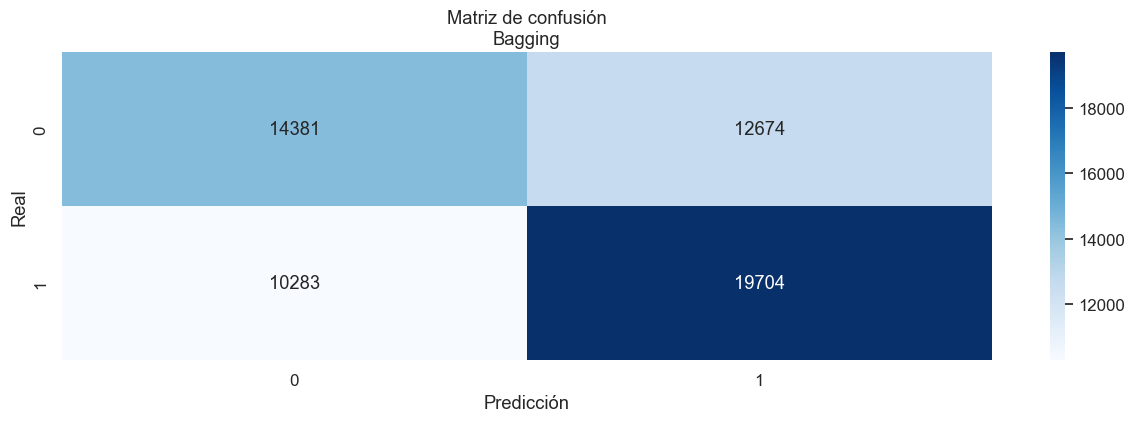

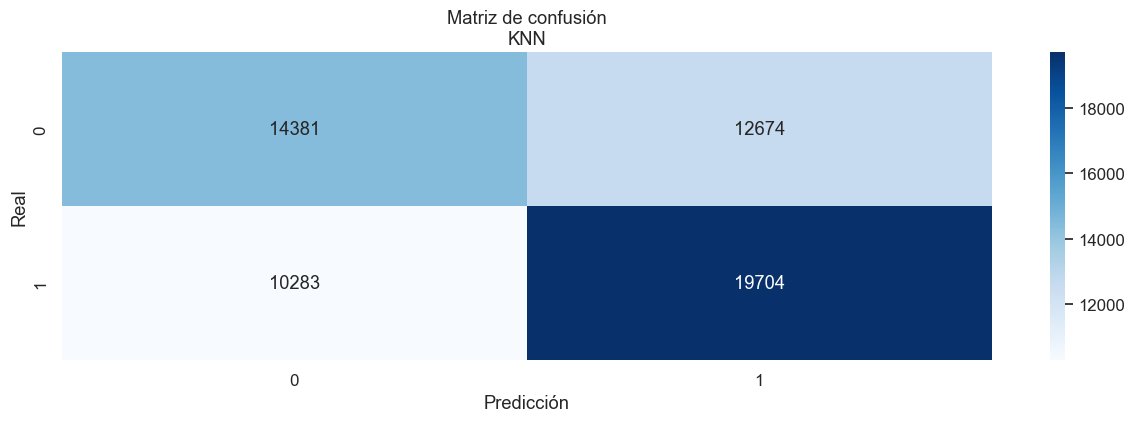

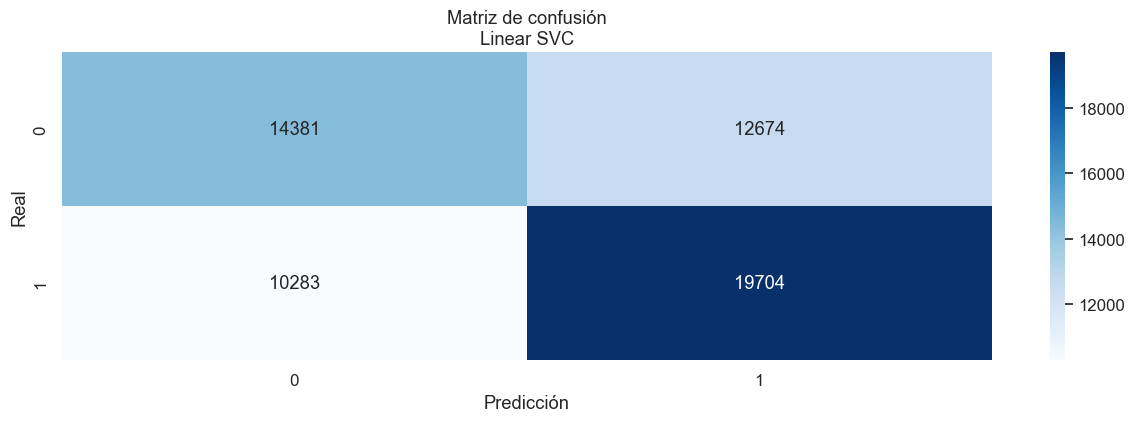

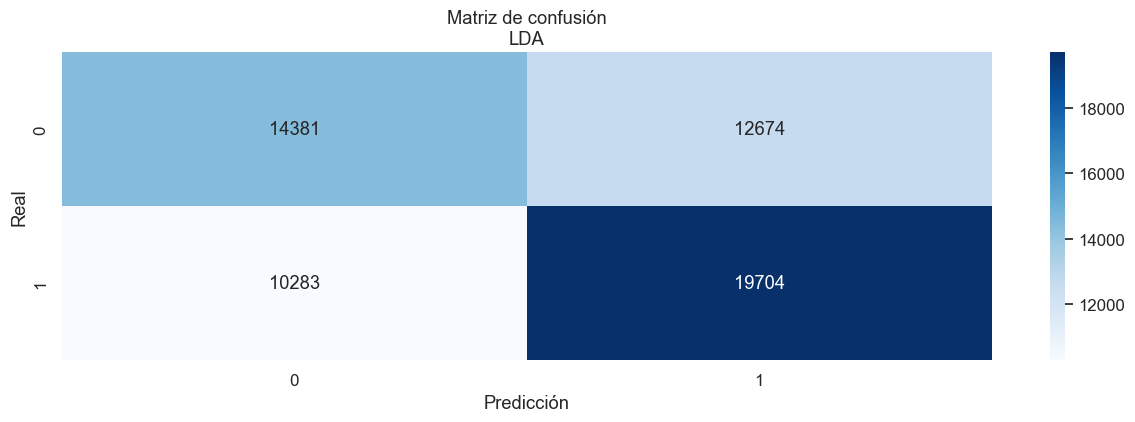

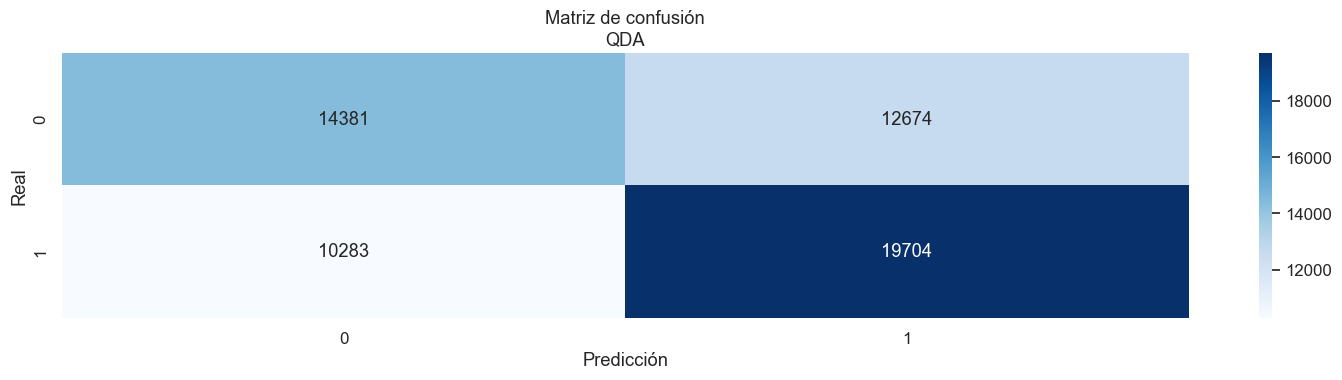

In [74]:

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    # plt.subplot(1, 3, i+1)
    plt.figure(figsize=(15, 4))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión\n{model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')

plt.tight_layout()
plt.show()


C:\Users\frany\AppData\Local\Temp\ipykernel_24156\3012847720.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
d:\Programs\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


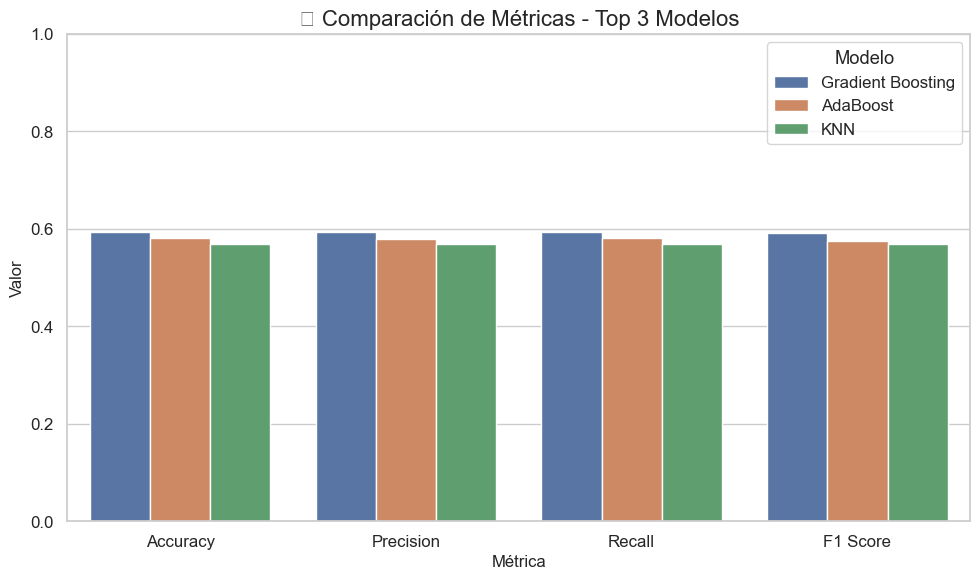

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar los 3 mejores modelos según el Accuracy
top_3 = df_resultados.nlargest(3, 'Accuracy')

# Reorganizar el DataFrame para graficar
df_melted = top_3.melt(id_vars='Modelo', 
                       value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
                       var_name='Métrica', 
                       value_name='Valor')

# Configurar estilo
sns.set(style='whitegrid', font_scale=1.1)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_melted)

# Personalizar gráfico
plt.title('📊 Comparación de Métricas - Top 3 Modelos', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Métrica', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()
